In [1]:
from bs4 import BeautifulSoup
import sys
import time
import logging
import argparse
import requests
import codecs
import urllib
import os
import requests
import json
import nltk
from nltk.corpus import stopwords
import gensim
from gensim.corpora import BleiCorpus
from gensim import corpora
from gensim.models import LdaModel
from scipy import stats
import corenlp

In [216]:
# K_TOPICS = 25

# if K_TOPICS == 50:
# # Topic labels for K=50 topics
# # interpreted from category weights for each topic from LDA model
#     TOPIC_LABELS = {
#     0 : 'Seating',
#     1 : 'Price/Payment',
#     2 : 'Atmosphere (people/energy)',
#     3 : 'location/convenience/service (cars, line)',
#     4 : 'savory food',
#     5 : 'Unknown #1',
#     6 : 'desserts/sweets',
#     7 : 'wait/line/order',
#     8 : 'Unknown #2',
#     9 : 'food / meat',
#     10 : 'design',
#     11 : 'convenient / easy to grab food',
#     12 : 'helpfulness/friendliness of staff',
#     13 : 'trendiness / uniqueness',
#     14 : 'bakery items / pastries',
#     15 : 'alcoholic beverages',
#     16 : 'Unknown #3',
#     17 : 'compared to Starbucks',
#     18 : 'cake / dessert',
#     19 : 'atmosphere / fun',
#     20 : 'order / waittime / service',
#     21 : 'specialty drinks (e.g. latte)',
#     22 : 'business / chain',
#     23 : 'seasonal drinks (WINTER?)',
#     24 : 'food service / servers',
#     25 : 'crepes',
#     26 : 'vegan / gluten-free? (slight)',
#     27 : 'chocolate desserts',
#     28 : 'star rating rationale?',
#     29 : 'breakfast/brunch',
#     30 : 'blended drinks (e.g. macchiato, matcha, fruit)',
#     31 : 'good for families/kids',
#     32 : 'hours / opening',
#     33 : 'tea beverages (e.g. boba)',
#     34 : 'lunch foods (sandwich, salad, soup)',
#     35 : 'ice cream, donut, waffle (sweet things)',
#     36 : 'refreshing things (coconut, tapioca, slushie)',
#     37 : 'General coffee shop (cup, bean, place)',
#     38 : 'nighttime / cocktails and bars',
#     39 : 'Would recommend the place ',
#     40 : 'Store / shopping',
#     41 : 'French cafe?',
#     42 : 'breakfast foods (eggs/bacon/toast,etc)',
#     43 : 'juice and smoothies',
#     44 : 'customer service',
#     45 : 'ambience / interior',
#     46 : 'Unknown #4',
#     47 : 'Unknown #5',
#     48 : 'Hotel cafe',
#     49 : 'Unknown #6',
#     }

# elif
# K_TOPICS == 25: 

# Topic labels for K=25 topics
# interpreted from category weights for each topic from LDA model
TOPIC_LABELS = {
0 : 'Atmosphere (place, staff, love, selection, music, fun)',
1 : 'Latte/Chai/Milk Drinks (latte, chai, vanilla, mocha, milk)',
2 : 'Wait Time / Service (time, place, food, order, service, wait)',
3 : 'Staff (guy, smile, lady, girl, thank you, counter)',
4 : 'Doughnuts (donut, doughnut, dozen, apple, dunkin, shop, creme)',
5 : 'Visited on Vacation (vacation, kale, parfait, frappe, paradise)',
6 : 'Food / Meals / Restaurant (food, place, restaurant, service, meal)',
7 : 'Physical Space (place, table, area, spot, staff, parking lot, space)',
8 : 'Baked Bread Items (bagels, pastry, bakery, bread, tart, cheese)',
9 : 'Sandwiches, Lunch, and Breakfast Food (sandwich, breakfast, food, lunch, egg)',
10 : 'Small Dessserts (cream, ice, waffle, strawberry, dessert, macaroon, banana)',
11 : 'Bakery Style Cakes (cake, dessert, cupcake, brownie, cheesecake, birthday, bakery)',
12 : 'Alcoholic Beverages (beer, wine, bottle, club)',
13 : 'Sweet Flavors (gelato, butter, taste, caramel, flavor, peanut, pistachio)',
14 : 'Unknown (die, der, da, le, ist, man)',
15 : 'Chocolates (bar, raspberry, fountain, dark, truffle)',
16 : 'Coffee – General (coffee, shop, place, cup, bean, espresso)',
17 : 'Juice (juice, roll, orange, cinnamon)',
18 : 'Tea (tea, selection, store, cup)',
19 : 'Cookies and Pastries (cookie, muffin, chip, scone, macarons, blueberry, salt, cheddar)',
20 : 'Customer Service (starbucks, location, time, service,customer, order, line, employee, staff)',
21 : 'Specialty Tea/Milk Drinks (tea, milk, drink, boba, place)',
22 : 'Young People (kid, place, class, year, hip, student, college)',
23 : 'Room (cafe, wall, room, door, floor)',
24 : 'Misc.'
}

In [191]:
# # Test on an example – applying LDA model to unseen review

# def predTopics(review_text):
#     separated_text = review_text.lower().split()
    
#     # apply LDA model
#     dictionary_path = "lda/dictionary.dict"
#     corpus_path = "lda/corpus.lda-c"
    
# #     if K_TOPICS == 50:
# #         lda_model_path = "lda/lda_50_topics.lda"
# #     elif K_TOPICS == 25:
#     lda_model_path = "lda/lda_25_topics.lda"

#     dictionary = corpora.Dictionary.load(dictionary_path)
#     corpus = corpora.BleiCorpus(corpus_path)
#     lda = LdaModel.load(lda_model_path)
    
#     review_bow = dictionary.doc2bow(separated_text)
    
#     return lda[review_bow]


# # Test on an example unseen review
# unseenReview = '''I absolutely love the vibe at Render Coffee. I went there to catch up on some work for the weekend, and managed to find some nice outdoor seating. It was nearing the middle of fall, and they brilliantly have a heater outside for chillier days. 

# I opted for a hot chocolate, which was relatively pricey but was delicious. The staff were also very understanding when a fly decided to take a dip in my drink. They ended up giving me a new cup of hit chocolate, free of charge!

# I wished that I tried some of their sandwiches, I was spying what others were ordering and the sandwiches looked so good. Will definitely be back to try some. Overall, love Render, just wish it was a tad more affordable!'''

# for (topic, weight) in predTopics(unseenReview):
#     print('Review has ' + str(weight*100) + '% weight ' + 'for topic: \n' + TOPIC_LABELS[topic] + '\n')

Review has 21.7238966477% weight for topic: 
Atmosphere (place, staff, love, selection, music, fun)

Review has 7.82228119299% weight for topic: 
Wait Time / Service (time, place, food, order, service, wait)

Review has 6.52270468795% weight for topic: 
Staff (guy, smile, lady, girl, thank you, counter)

Review has 2.98964361085% weight for topic: 
Food / Meals / Restaurant (food, place, restaurant, service, meal)

Review has 6.08804856195% weight for topic: 
Physical Space (place, table, area, spot, staff, parking lot, space)

Review has 2.46743951702% weight for topic: 
Baked Bread Items (bagels, pastry, bakery, bread, tart, cheese)

Review has 2.37473897417% weight for topic: 
Sandwiches, Lunch, and Breakfast Food (sandwich, breakfast, food, lunch, egg)

Review has 4.28694296946% weight for topic: 
Bakery Style Cakes (cake, dessert, cupcake, brownie, cheesecake, birthday, bakery)

Review has 9.65643902052% weight for topic: 
Alcoholic Beverages (beer, wine, bottle, club)

Review has

In [192]:
# import corenlp
# import numpy as np

# def sentimentScore(text):
#     # Before running corenlp, must start up NLP server using:
#     # java -mx4g -cp "*" edu.stanford.nlp.pipeline.StanfordCoreNLPServer -port 9000 -timeout 15000

#     sentences = list(filter(None, text.replace('\n','').split('.')))
#     sentimentVals = []
#     for sentence in sentences:
#         try:
#             sentimentVals.append(corenlp.sentiment_analysis_on_sentence(sentence))
#         except:
#             continue
        
#     return np.mean(sentimentVals)

In [193]:
# def get_reviews(theurl):
#     '''Get 20 reviews from first page of restaurant'''
#     reviewInfo = {}
    
#     stop = set(stopwords.words('english'))
    
#     main_page = requests.get(theurl)
#     if main_page.status_code == 200:
#         soup = BeautifulSoup(main_page.content, "html.parser")
#     else:
#         print('Non-200 status code. Get request for url failed.')
    
#     review_div = soup.findAll('div',{'itemprop':'review'})

#     reviewCount = 1
    
#     for i in review_div: # iterating through review_div 
#         # get review star rating
#         reviewStar = float(i.find('meta',{'itemprop':'ratingValue'}).get('content', None))

#         # get review body text
#         reviewBody = i.find('p',{'itemprop':'description'})
#         for txt in reviewBody:
#             if type(txt) != '<p>' and not str(txt).startswith('<p>'):
#                 reviewText = txt
        
#         topics = predTopics(reviewText)
#         sentiment = sentimentScore(reviewText)
        
#         reviewInfo[reviewCount] = {'review_stars' : reviewStar, \
#                                    'review_text': reviewText, \
#                                    'review_topics' : topics, \
#                                    'sentiment_score' : sentiment} 
#         reviewCount += 1
        
#     return reviewInfo
    

In [2]:
def predTopics(review_text):
    separated_text = review_text.lower().split()
    
    # apply LDA model
    dictionary_path = "lda/dictionary.dict"
    corpus_path = "lda/corpus.lda-c"

    lda_model_path = "lda/lda_25_topics.lda"

    dictionary = corpora.Dictionary.load(dictionary_path)
    corpus = corpora.BleiCorpus(corpus_path)
    lda = LdaModel.load(lda_model_path)
    
    review_bow = dictionary.doc2bow(separated_text)
    
    return lda[review_bow]

def sentimentScore(text):
    # Before running corenlp, must start up NLP server using:
    # java -mx4g -cp "*" edu.stanford.nlp.pipeline.StanfordCoreNLPServer -port 9000 -timeout 15000

    sentences = list(filter(None, text.replace('\n','').split('.')))
    sentimentVals = []
    for sentence in sentences:
        try:
            sentimentVals.append(corenlp.sentiment_analysis_on_sentence(sentence))
        except:
            continue
        
    return np.mean(sentimentVals)

def get_reviews(theurl):
    '''Get 20 reviews from first page of restaurant'''
    reviewInfo = {}
    
    stop = set(stopwords.words('english'))
    
    main_page = requests.get(theurl)
    if main_page.status_code == 200:
        soup = BeautifulSoup(main_page.content, "html.parser")
    else:
        print('Non-200 status code. Get request for url failed.')
    
    review_div = soup.findAll('div',{'itemprop':'review'})

    reviewCount = 1
    
    for i in review_div: # iterating through review_div 
        # get review star rating
        reviewStar = float(i.find('meta',{'itemprop':'ratingValue'}).get('content', None))

        # get review body text
        reviewBody = i.find('p',{'itemprop':'description'})
        for txt in reviewBody:
            if type(txt) != '<p>' and not str(txt).startswith('<p>'):
                reviewText = txt
        
        topics = predTopics(reviewText)
        sentiment = sentimentScore(reviewText)
        
        reviewInfo[reviewCount] = {'review_stars' : reviewStar, \
                                   'review_text': reviewText, \
                                   'review_topics' : topics, \
                                   'sentiment_score' : sentiment} 
        reviewCount += 1
        
    return reviewInfo

def getReviewData(resUrl):
    '''Return dictionary of reviews (with their extracted topics and sentiment scores)
       and the least frequent topics across all reviews for this restaurant
    '''
    resReviews = get_reviews(resUrl)
    
    resData = {}
    
    for count, items in resReviews.items():
        resData[count] = {'review_stars' : items['review_stars'],
                          'review_text' : items['review_text'],
                          'review_topics' : sorted([(t,TOPIC_LABELS[t],w) for (t,w) in items['review_topics']], key=lambda x: x[2], reverse=True),
                          'sentiment_score' : items['sentiment_score']}
        
    return resData

def getLeastFrequent(reviewData):
    topicWeightList = []
    for count, item in reviewData.items():
        this = [(i[0], i[2]) for i in item['review_topics']]
        topicWeightList.append(this)
        
    total = 0
    topicDistribution = [0 for i in range(0,25)]
    for review in topicWeightList:
        for item in review:
            index = item[0]
            topicDistribution[index] += item[1]
            total += item[1]
    topicDistribution
    topicDistDict = {}
    for i in range(len(topicDistribution)):
        topicDistDict[TOPIC_LABELS[i]] =  topicDistribution[i]/total

    leastFrequent = []
    for topic in topicDistDict.keys():
        if topicDistDict[topic] < .02:
            leastFrequent.append(topic)
            
    return leastFrequent

def topicsByWeight(data):
    '''Return list of ranked topics from highest to lowest aggregate weight on restaurant's reviews.'''
    topic_weights = {}
    
    for count, items in data.items():
        for topic in items['review_topics']:
            if topic[1] not in topic_weights:
                topic_weights[topic[1]] = topic[2]            
            else:
                topic_weights[topic[1]] += topic[2]
    
    ranked_topics = sorted(list(topic_weights.items()), key=lambda x: x[1], reverse=True)
    
    return ranked_topics

def getStats(data):
    '''Return ranked topics (by weight) and dictionary of stars/sentiment score for each topic'''
    topic_weights = {}
    stars_sentiments = {topic_name: {'sentiments':[], 'stars':[]} for n, topic_name in TOPIC_LABELS.items()}
    
    for count, items in data.items():
        for topic in items['review_topics']:
            stars_sentiments[topic[1]]['sentiments'].append(items['sentiment_score'])
            stars_sentiments[topic[1]]['stars'].append(items['review_stars'])
    
    # calculate average sentiment scores and star ratings for each topic
    for k in stars_sentiments:
        stars_sentiments[k]['sentiments'] = np.mean(stars_sentiments[k]['sentiments'])
        stars_sentiments[k]['stars'] = np.mean(stars_sentiments[k]['stars'])
        
    stars_sentiments = {topicItems[0]:topicItems[1] for topicItems in list(stars_sentiments.items()) \
                        if not np.isnan(topicItems[1]['sentiments']) and not topicItems[0] in getLeastFrequent(data)}
    
    return stars_sentiments
    
def rankBySentiment(ss_stats):
    topicSentimentsRanked = sorted([(i[0],i[1]['sentiments']) for i in list(ss_stats.items())], key=lambda x:x[1], reverse=True)
    return topicSentimentsRanked

def rankByStars(ss_stats):
    topicStarsRanked = sorted([(i[0],i[1]['stars']) for i in list(ss_stats.items())], key=lambda x:x[1], reverse=True)
    return topicStarsRanked

def regSentStars(ss_stats):
    '''Do linear regression of sentiment score on star rating.
       Return slope, intercept, r_squared, p_value, std_err of regression
    '''

    topicSentiments = [i['sentiments'] for i in list(ss_stats.values())]
    topicStars = [i['stars'] for i in list(ss_stats.values())]
    slope, intercept, r_value, p_value, std_err = stats.linregress(topicSentiments, topicStars)
    
#     print('slope : ', slope)
#     print('intercept : ', intercept)
#     print('r_squared : ', r_value**2)
#     print('p_value : ', p_value)
#     print('std_err : ', std_err)
    
    return slope, intercept, r_value**2, p_value, std_err

def sentimentGroup(n):
    '''Takes sentiment score and classifies into sentiment group'''
    if round(n, 0) == 0:
        return 'very negative ({})'.format(str(round(n,2)))
    if round(n, 0) == 1:
        return 'negative ({})'.format(str(round(n,2)))
    elif round(n, 0) == 2:
        if n < 1.75:
            return 'slightly negative ({})'.format(str(round(n,2)))
        elif n > 2.25:
            return 'slightly positive ({})'.format(str(round(n,2)))
        else:
            return 'neutral ({})'.format(str(round(n,2)))
    elif round(n, 0) == 3:
        return 'positive ({})'.format(str(round(n,2)))
    elif round(n, 0) == 4:
        return 'very positive ({})'.format(str(round(n,2)))
 
def recommend(data, sentimentRank, starRank):
    '''Prints a recommendation based on the cafe's topic sentiments and stars '''
    
#     print('People feel good about these aspects of this cafe...')
#     posFeelings = [print('* ' + topic[0].split('(')[0] + ' ({})'.format(str(topic[1]))) for topic in sentimentRank[0:3]]
#     print()
#     print("However, they don't feel so good about these aspects of this cafe...")
#     negFeelings = [print('* ' + topic[0].split('(')[0] + ' ({})'.format(str(topic[1]))) for topic in sentimentRank[-3:]]
#     print()
#     print("Ratings for reviews about these topics are high...")
#     posStars = [print('* ' + topic[0].split('(')[0] + ' ({})'.format(str(topic[1]))) for topic in starRank[0:3]]
#     print()
#     print("Reviews for reviews about these topics are low...")
#     negStars = [print('* ' + topic[0].split('(')[0] + ' ({})'.format(str(topic[1]))) for topic in starRank[-3:]]
#     print()
    
    composite = sorted([(name, (stats['sentiments'], stats['stars'])) for name, stats in getStats(cafe_data).items()], key=lambda x:x[1], reverse=True)
    
    print('RECOMMENDATION: \n')
    print('Keep up the good work with...')
    posRecc = [print('---> ' + topic[0].split('(')[0] + '(avg. sentiment: {} / avg. stars: {})'.format(sentimentGroup(topic[1][0]), round(topic[1][1], 2))) for topic in composite[0:3]]
    print()
    print('May need to make improvements where performing lowest...')
    negRecc = [print('---> ' + topic[0].split('(')[0] + '(avg. sentiment: {} / avg. stars: {})'.format(sentimentGroup(topic[1][0]), round(topic[1][1], 2))) for topic in composite[-3:]]

def predictStars(data, unseenReview):
    '''Predict star rating for a based on a review's sentiment'''
    sentiment_score = sentimentScore(unseenReview)
    print('sentiment_score : ' + str(sentiment_score))
    predStars = regSentStars(getStats(data))[1] + regSentStars(getStats(data))[0]*sentiment_score
    return predStars

In [ ]:
cafe_data = getReviewData('https://www.yelp.com/biz/pavement-coffeehouse-boston-5')

In [ ]:
myreview = '''Small little coffee house perfect for a bagel sandwich before you hop on the T. It just doesn't sit right with me that a bagel sandwich with an iced coffee set me back like $11. It's hardly a sit down restaurant it's more of a "grab and go" place so I definitely think it's overpriced. The food at least was really good. Jalepeno cream cheese FTW!'''

cafeSent = rankBySentiment(getStats(cafe_data))
cafeStars = rankByStars(getStats(cafe_data))
predStars(cafe_data, myreview)
# recommend(cafe_data, cafeSent, cafeStars)
# getStats(cafe_data)

In [194]:
# Test on multiple reviews for a particular coffee place
pavementUrl = 'https://www.yelp.com/biz/pavement-coffeehouse-boston'
pavementReviews = get_reviews(pavementUrl)

In [241]:
pavementData = {}

for count, items in pavementReviews.items():
    pavementData[count] = {'review_stars' : items['review_stars'],
                           'review_text' : items['review_text'],
                           'review_topics' : sorted([(t,TOPIC_LABELS[t],w) for (t,w) in items['review_topics']], key=lambda x: x[2], reverse=True),
                           'sentiment_score' : items['sentiment_score']}
    
pavementData

{1: {'review_stars': 4.0,
  'review_text': 'Pavement has a calm, jazzy vibe to it. It feels light and relaxed where you can enjoy a nice conversation with someone without feeling cramped by students with papers and laptops. The decor is really nice and simplistic. I adored the boho colorful tabletops, and I almost wanted to ask where they were from. \n\nI ordered a Spanish latte and received a deliciously light and foamy latte. The barista was pretty accurate pressing down the espresso, and you could tell he was pretty skilled in latte art as he left me a lovely flower in my latte. \n\nI wish they had more choices for specialty lattes. They only had the basics of vanilla, Spanish, chai, etc.',
  'review_topics': [(0,
    'Atmosphere (place, staff, love, selection, music, fun)',
    0.16269280761366453),
   (22,
    'Young People (kid, place, class, year, hip, student, college)',
    0.090965474072581085),
   (1,
    'Latte/Chai/Milk Drinks (latte, chai, vanilla, mocha, milk)',
    0.08

In [210]:
# pavementDataRefined = {}
# for count, items in pavementData.items():
#     weightMedian = np.median([tup[2] for tup in items['review_topics']])
#     refinedTopics = [(num,name,w) for (num,name,w) in items['review_topics'] if w > weightMedian]
    
#     pavementDataRefined[count] = {'review_stars' : items['review_stars'],
#                                    'review_text' : items['review_text'],
#                                    'review_topics' : sorted(refinedTopics, key=lambda x: x[2], reverse=True),
#                                     'sentiment_score' : items['sentiment_score']}
# pavementData = pavementDataRefined

In [211]:
pavementTopicWeights = {}
topicStarsSentiments = {topic_name: {'sentiments':[], 'stars':[]} for n, topic_name in TOPIC_LABELS.items()}

# topicSentiments = {topic_name: [] for n, topic_name in TOPIC_LABELS.items()}
# topicStars = {topic_name: [] for n, topic_name in TOPIC_LABELS.items()}

for count, items in pavementData.items():
    for topic in items['review_topics']:
        if topic[1] not in pavementTopicWeights:
            pavementTopicWeights[topic[1]] = topic[2]            
        else:
            pavementTopicWeights[topic[1]] += topic[2]
        
        topicStarsSentiments[topic[1]]['sentiments'].append(items['sentiment_score'])
        topicStarsSentiments[topic[1]]['stars'].append(items['review_stars'])

pavementRankedTopics = sorted(list(pavementTopicWeights.items()), key=lambda x: x[1], reverse=True)

# calculate average sentiment scores and star ratings for each topic
for k in topicStarsSentiments:
    topicStarsSentiments[k]['sentiments'] = np.mean(topicStarsSentiments[k]['sentiments'])
    topicStarsSentiments[k]['stars'] = np.mean(topicStarsSentiments[k]['stars'])
    
# topicSentimentsRanked = sorted([item for item in topicSentiments.items()], key=lambda x: x[1], reverse=True)
# topicStarsRanked = sorted([item for item in topicStars.items()], key=lambda x: x[1], reverse=True)

topicStarsSentiments = {topicItems[0]:topicItems[1] for topicItems in list(topicStarsSentiments.items()) \
                        if not np.isnan(topicItems[1]['sentiments'])}
topicStarsSentiments

{'Alcoholic Beverages (beer, wine, bottle, club)': {'sentiments': 1.7099867724867723,
  'stars': 3.75},
 'Atmosphere (place, staff, love, selection, music, fun)': {'sentiments': 1.7694940476190477,
  'stars': 3.875},
 'Baked Bread Items (bagels, pastry, bakery, bread, tart, cheese)': {'sentiments': 1.6918470418470419,
  'stars': 3.2727272727272729},
 'Bakery Style Cakes (cake, dessert, cupcake, brownie, cheesecake, birthday, bakery)': {'sentiments': 1.9265211640211639,
  'stars': 3.5},
 'Chocolates (bar, raspberry, foundtain, dark, truffle)': {'sentiments': 1.5698412698412698,
  'stars': 3.25},
 'Coffee – General (coffee, shop, place, cup, bean, espresso)': {'sentiments': 1.8404365079365079,
  'stars': 3.5},
 'Cookies and Pastries (cookie, muffin, chip, scone, macarons, blueberry, salt, cheddar)': {'sentiments': 1.6726190476190477,
  'stars': 4.0},
 'Customer Service (starbucks, location, time, service,customer, order, line, employee, staff)': {'sentiments': 1.8187169312169311,
  'star

In [212]:
# rank topic by star rating
topicSentimentsRanked = sorted([(i[0],i[1]['sentiments']) for i in list(topicStarsSentiments.items())], key=lambda x:x[1], reverse=True)
topicSentimentsRanked

[('Wait Time / Service (time, place, food, order, service, wait)',
  2.0019841269841274),
 ('Bakery Style Cakes (cake, dessert, cupcake, brownie, cheesecake, birthday, bakery)',
  1.9265211640211639),
 ('Young People (kid, place, class, year, hip, student, college)',
  1.8917548500881836),
 ('Physical Space (place, table, area, spot, staff, parking lot, space)',
  1.8722470238095239),
 ('Coffee – General (coffee, shop, place, cup, bean, espresso)',
  1.8404365079365079),
 ('Doughnuts (donut, doughnut, dozen, apple, dunkin, shop, creme)',
  1.8297178130511464),
 ('Customer Service (starbucks, location, time, service,customer, order, line, employee, staff)',
  1.8187169312169311),
 ('Misc.', 1.7975925925925924),
 ('Juice (juice, roll, orange, cinnamon)', 1.7841269841269842),
 ('Atmosphere (place, staff, love, selection, music, fun)',
  1.7694940476190477),
 ('Staff (guy, smile, lady, girl, thank you, counter)', 1.7578798185941042),
 ('Sweet Flavors (gelato, butter, taste, caramel, flavor

In [213]:
# rank topic by sentiment score
topicStarsRanked = sorted([(i[0],i[1]['stars']) for i in list(topicStarsSentiments.items())], key=lambda x:x[1], reverse=True)
topicStarsRanked

[('Cookies and Pastries (cookie, muffin, chip, scone, macarons, blueberry, salt, cheddar)',
  4.0),
 ('Physical Space (place, table, area, spot, staff, parking lot, space)', 4.0),
 ('Wait Time / Service (time, place, food, order, service, wait)',
  3.8999999999999999),
 ('Atmosphere (place, staff, love, selection, music, fun)', 3.875),
 ('Latte/Chai/Milk Drinks (latte, chai, vanilla, mocha, milk)',
  3.8571428571428572),
 ('Misc.', 3.7999999999999998),
 ('Alcoholic Beverages (beer, wine, bottle, club)', 3.75),
 ('Staff (guy, smile, lady, girl, thank you, counter)', 3.7142857142857144),
 ('Tea (tea, selection, store, cup)', 3.6666666666666665),
 ('Young People (kid, place, class, year, hip, student, college)',
  3.6666666666666665),
 ('Doughnuts (donut, doughnut, dozen, apple, dunkin, shop, creme)',
  3.6666666666666665),
 ('Sweet Flavors (gelato, butter, taste, caramel, flavor, peanut, pistachio)',
  3.6153846153846154),
 ('Customer Service (starbucks, location, time, service,customer,

In [214]:
pavementRankedTopics

[('Physical Space (place, table, area, spot, staff, parking lot, space)',
  3.0646081532775447),
 ('Coffee – General (coffee, shop, place, cup, bean, espresso)',
  1.6563981521042255),
 ('Misc.', 1.3291116351179728),
 ('Customer Service (starbucks, location, time, service,customer, order, line, employee, staff)',
  1.2014814948660022),
 ('Sweet Flavors (gelato, butter, taste, caramel, flavor, peanut, pistachio)',
  1.1037590732041715),
 ('Wait Time / Service (time, place, food, order, service, wait)',
  1.0612981297077675),
 ('Tea (tea, selection, store, cup)', 0.98049048828643781),
 ('Sandwiches, Lunch, and Breakfast Food (sandwich, breakfast, food, lunch, egg)',
  0.96760331271572786),
 ('Staff (guy, smile, lady, girl, thank you, counter)', 0.94292171053844243),
 ('Baked Bread Items (bagels, pastry, bakery, bread, tart, cheese)',
  0.87849533368452548),
 ('Atmosphere (place, staff, love, selection, music, fun)',
  0.80879407470996711),
 ('Alcoholic Beverages (beer, wine, bottle, club

In [215]:
# Linear regression of sentiment score on star rating

topicSentiments = [i['sentiments'] for i in list(topicStarsSentiments.values())]
topicStars = [i['stars'] for i in list(topicStarsSentiments.values())]
slope, intercept, r_value, p_value, std_err = stats.linregress(topicSentiments, topicStars)

print('slope : ', slope)
print('intercept : ', intercept)
print('r_squared : ', r_value**2)
print('p_value : ', p_value)
print('std_err : ', std_err)

slope :  0.984101641368
intercept :  1.81570936658
r_squared :  0.265380536332
p_value :  0.00840667872427
std_err :  0.341407234592


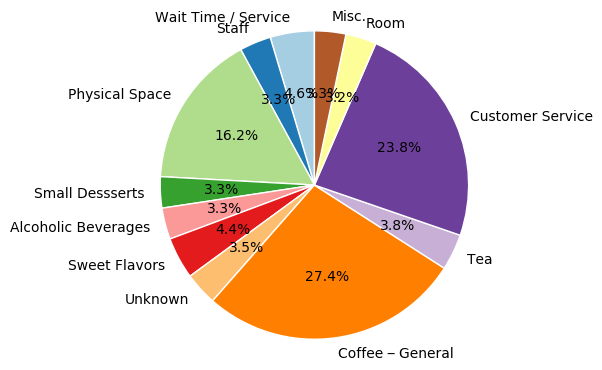

In [146]:
theseTOPIC_LABELS = {
0 : 'Atmosphere',
1 : 'Latte/Chai/Milk Drinks',
2 : 'Wait Time / Service',
3 : 'Staff',
4 : 'Doughnuts',
5 : 'Visited on Vacation',
6 : 'Food / Meals / Restaurant',
7 : 'Physical Space',
8 : 'Baked Bread Items',
9 : 'Sandwiches, Lunch, and Breakfast Food',
10 : 'Small Dessserts',
11 : 'Bakery Style Cakes',
12 : 'Alcoholic Beverages',
13 : 'Sweet Flavors',
14 : 'Unknown',
15 : 'Chocolates',
16 : 'Coffee – General',
17 : 'Juice',
18 : 'Tea ',
19 : 'Cookies and Pastries',
20 : 'Customer Service',
21 : 'Specialty Tea/Milk Drinks',
22 : 'Young People',
23 : 'Room',
24 : 'Misc.'
}

import matplotlib.pyplot as plt
import matplotlib.cm as cm

unseenReview = '''
Went in here for the first time today to just grab a cup of coffee and do some studying. Great atmosphere. Not a lot of tables to sit down and people tend to stay there for a long time but that’s typical of most coffee shops especially when their coffee is as good as theirs. I actually just got their regular drip coffee and it was some of the best standard coffee around..
'''
labels = []
fracs = []
for (topic, weight) in predTopics(unseenReview):
#     print('Review has ' + str(weight*100) + '% weight ' + 'for topic: \n' + TOPIC_LABELS[topic] + '\n')
    fracs.append(weight*100)
    labels.append(theseTOPIC_LABELS[topic])
    
cmap = plt.cm.get_cmap('Paired')
colors = cmap(np.linspace(0, 1, len(labels)))

explode=np.zeros(len(labels))

fig1, ax1 = plt.subplots()
pie_collection = ax1.pie(fracs, explode=explode, labels=labels, autopct='%1.1f%%',startangle=90, colors=colors,labeldistance=1.1)

for pie_wedge in pie_collection[0]:
    pie_wedge.set_edgecolor('white')

ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()